In [1]:
import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

/Volumes/BigBox/Python/anaconda3/envs/my_project_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df['month_name'] = df['job_posted_date'].dt.month_name()
df['month_number'] = df['job_posted_date'].dt.month

df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

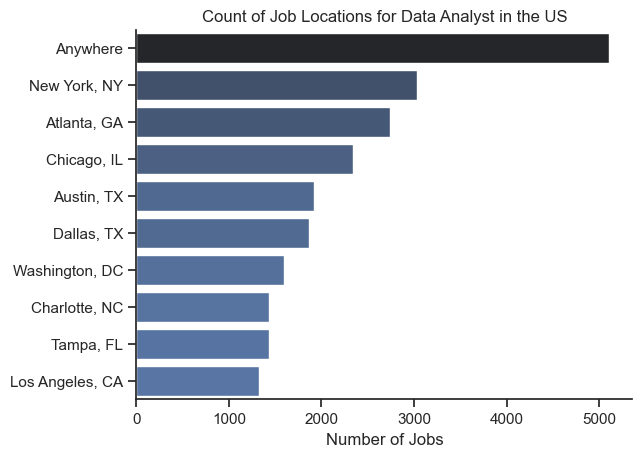

In [3]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y = 'job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

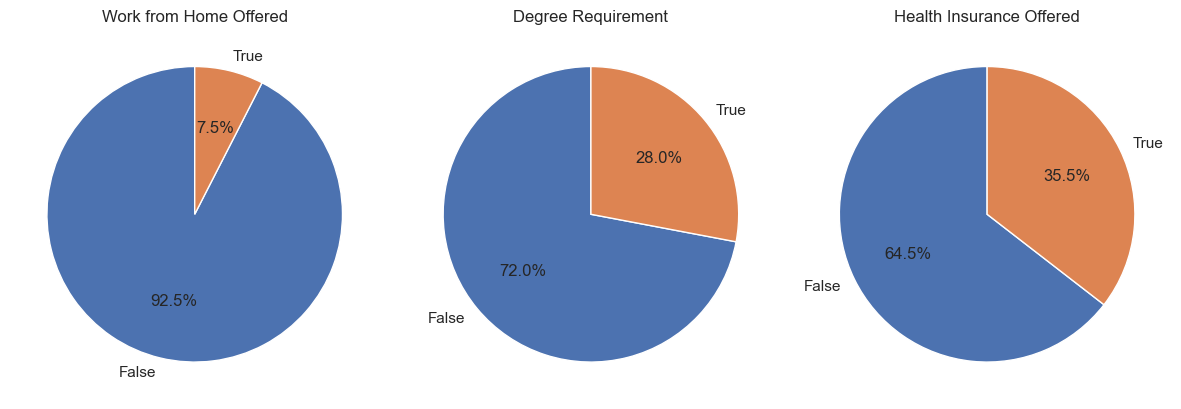

In [4]:
dict_column = {
    'job_work_from_home' : 'Work from Home Offered',
    'job_no_degree_mention' : 'Degree Requirement',
    'job_health_insurance' : 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    df_DA_US[column].value_counts().plot(kind = 'pie', startangle = 90, autopct = '%1.1f%%', ax = ax[i])
    ax[i].set_title(title)
    ax[i].set_ylabel('')

fig.tight_layout()
plt.show()

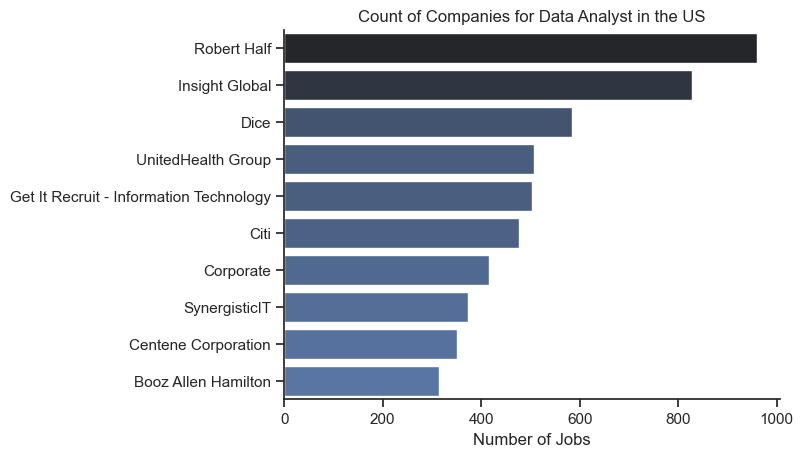

In [5]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y = 'company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

In [11]:
df_DA_US_pivot = df_DA_US.pivot_table(index=['month_name', 'month_number'], columns='job_title_short', aggfunc='size')

In [15]:
df_DA_US_pivot.sort_values(by='month_number', inplace=True)
df_DA_US_pivot.reset_index(level='month_number', drop=True, inplace=True)

KeyError: 'month_number'

In [63]:
df_DA_US_salary_pivot = df_DA_US.pivot_table(index=['month_name', 'month_number'], values='salary_year_avg', aggfunc='mean')
df_DA_US_salary_pivot.sort_index(level='month_number', inplace=True)
df_DA_US_salary_pivot.reset_index(level='month_number', drop=True, inplace=True)

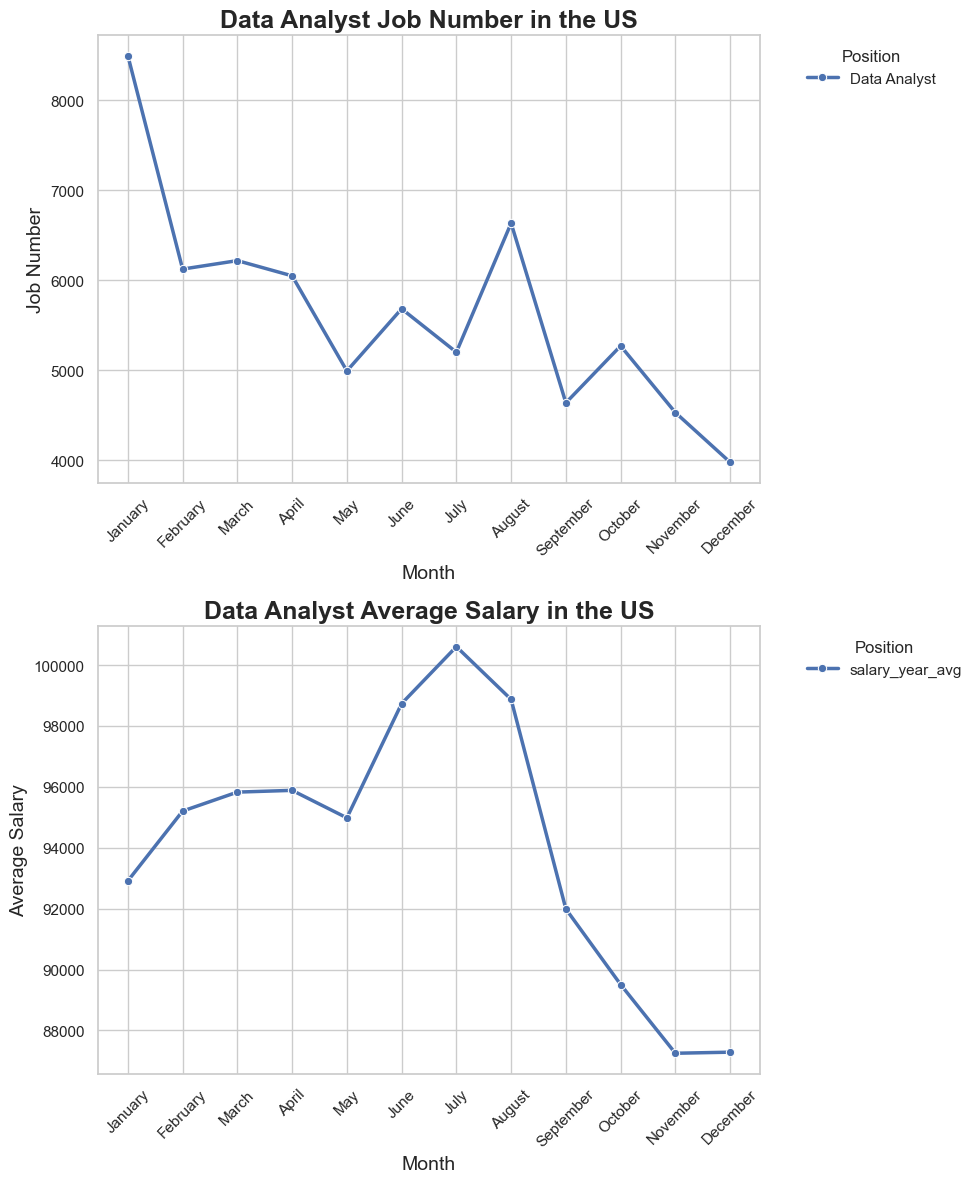

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 12))  

# Настроим тему
sns.set_theme(style='whitegrid', context='notebook')

# Рисуем на первом subplot-е
sns.lineplot(data=df_DA_US_pivot, linewidth=2.5, marker="o", ax=ax[0])

# Украшаем первый subplot
ax[0].set_title("Data Analyst Job Number in the US", fontsize=18, weight="bold")
ax[0].set_xlabel("Month", fontsize=14)
ax[0].set_ylabel("Job Number", fontsize=14)
ax[0].tick_params(axis="x", rotation=45)
ax[0].legend(title="Position", bbox_to_anchor=(1.05, 1), loc='upper left')


sns.lineplot(data=df_DA_US_salary_pivot, linewidth = 2.5, marker='o', ax=ax[1])
ax[1].set_title("Data Analyst Average Salary in the US", fontsize = 18, weight = 'bold')
ax[1].set_xlabel("Month", fontsize = 14)
ax[1].set_ylabel("Average Salary", fontsize=14)
ax[1].tick_params(axis="x", rotation=45) 
ax[1].legend(title="Position", bbox_to_anchor=(1.05, 1), loc='upper left')


# Чтобы всё влезло красиво
fig.tight_layout()
plt.show()
